In [13]:
import sys
!{sys.executable} -m pip install ultralytics


In [15]:
from ultralytics import YOLO
import torch

print("CUDA available:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0))



CUDA available: True
GPU: NVIDIA GeForce RTX 3060 Laptop GPU


In [17]:
model = YOLO("yolov8n.pt")


In [19]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # nano model (best for 6GB RTX 3060)


In [21]:
model.train(
    data="C:/Users/asus/Desktop/PV dataset/SPHERE DATASET/SPHERE DATASET/SPHERE - LABELLED DATASET/YOLO/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=0,
    workers=4,
    project="yolo_runs",
    name="broken_clean_dirty",
    pretrained=True
)


Ultralytics 8.3.240  Python-3.11.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/asus/Desktop/PV dataset/SPHERE DATASET/SPHERE DATASET/SPHERE - LABELLED DATASET/YOLO/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=broken_clean_dirty9, nbs=64, nms=False, opset=Non

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D5CDA56C10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [98]:
from ultralytics import YOLO

# Load trained model
model = YOLO(r"C:/Users/asus/runs/detect/train9/weights/best.pt")

# Validate and save confusion matrix
results = model.val(
    data=r"C:/Users/asus/Desktop/PV dataset/SPHERE DATASET/SPHERE DATASET/SPHERE - LABELLED DATASET/YOLO/data.yaml",
    device="cpu",
    save_conf=True  # generates confusion matrix image
)



Ultralytics 8.3.240  Python-3.11.14 torch-2.5.1 CPU (AMD Ryzen 9 5900HX with Radeon Graphics)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.20.0 ms, read: 110.696.2 MB/s, size: 42.9 KB)
val: Scanning C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\labels\val.cache... 1216 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1216/1216  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 76/76 1.4s/it 1:471.4sss
                   all       1216       1216      0.894      0.932      0.964      0.964
                broken        341        341      0.982      0.967      0.991      0.991
                 clean        426        426      0.845      0.925      0.962      0.962
                 dirty        449        449      0.855      0.904      0.939      0.939
Speed: 1.1ms preprocess, 75.7ms inference, 0.0ms loss, 0.

In [5]:
%matplotlib inline


File exists: True


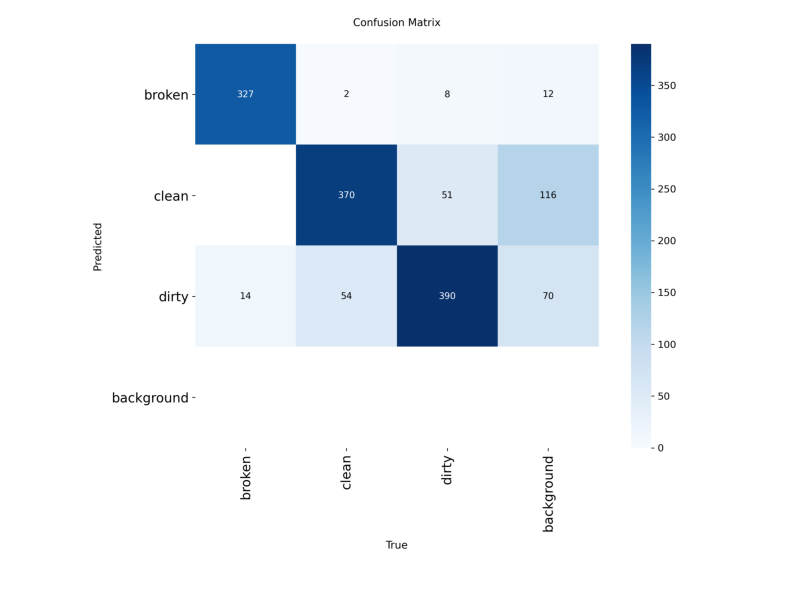

In [88]:
from PIL import Image
import matplotlib.pyplot as plt
import os

conf_path = r"C:/Users/asus/runs/detect/val8/confusion_matrix.png"

print("File exists:", os.path.exists(conf_path))

img = Image.open(conf_path)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")
plt.show()


In [102]:
precision, recall, map50, map5095 = results.mean_results()

print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"mAP@0.5 Accuracy   : {map50*100:.4f}")
print(f"mAP@0.5:0.95 : {map5095:.4f}")
#mAP@0.5:0.95 evaluates detection performance across multiple IoU thresholds, ensuring both correct classification and precise localization of objects.

Precision : 0.8942
Recall    : 0.9320
mAP@0.5 Accuracy   : 96.4070
mAP@0.5:0.95 : 0.9640


In [23]:
from ultralytics import YOLO

model = YOLO(r"C:/Users/asus/runs/detect/train9/weights/best.pt")

model.export(
    format="onnx",
    opset=16,
    device="cpu"
)


Ultralytics 8.3.240  Python-3.11.14 torch-2.5.1 CPU (AMD Ryzen 9 5900HX with Radeon Graphics)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'C:\Users\asus\runs\detect\train9\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  6.8s
WARNING requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.20.1 opset 16...
ONNX: slimming with onnxslim 0.1.82...
ONNX: export success  9.7s, saved as 'C:\Users\asus\runs\detect\train9\weights\best.onnx' (11.7 MB)

Export complete (10.2s)
Results saved to C:\Users\asus\runs\detect\train9\weights
Predict:         yolo predict task=detect model=C:\Users\asus\runs\detect\train9\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=C:\Users\asus\runs\detec

'C:\\Users\\asus\\runs\\detect\\train9\\weights\\best.onnx'


image 1/1 C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\images\test\0428dc35-000406108_1_Broken_2635_2129aug2.jpg: 640x640 1 broken, 119.2ms
Speed: 8.2ms preprocess, 119.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\images\test\0428dc35-000406108_1_Broken_2635_2129aug3.jpg: 640x640 1 broken, 107.3ms
Speed: 6.6ms preprocess, 107.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\images\test\0428dc35-000406108_1_Broken_2642_591aug1.jpg: 640x640 1 broken, 109.6ms
Speed: 5.6ms preprocess, 109.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\images\test\0428dc35-000406108_1

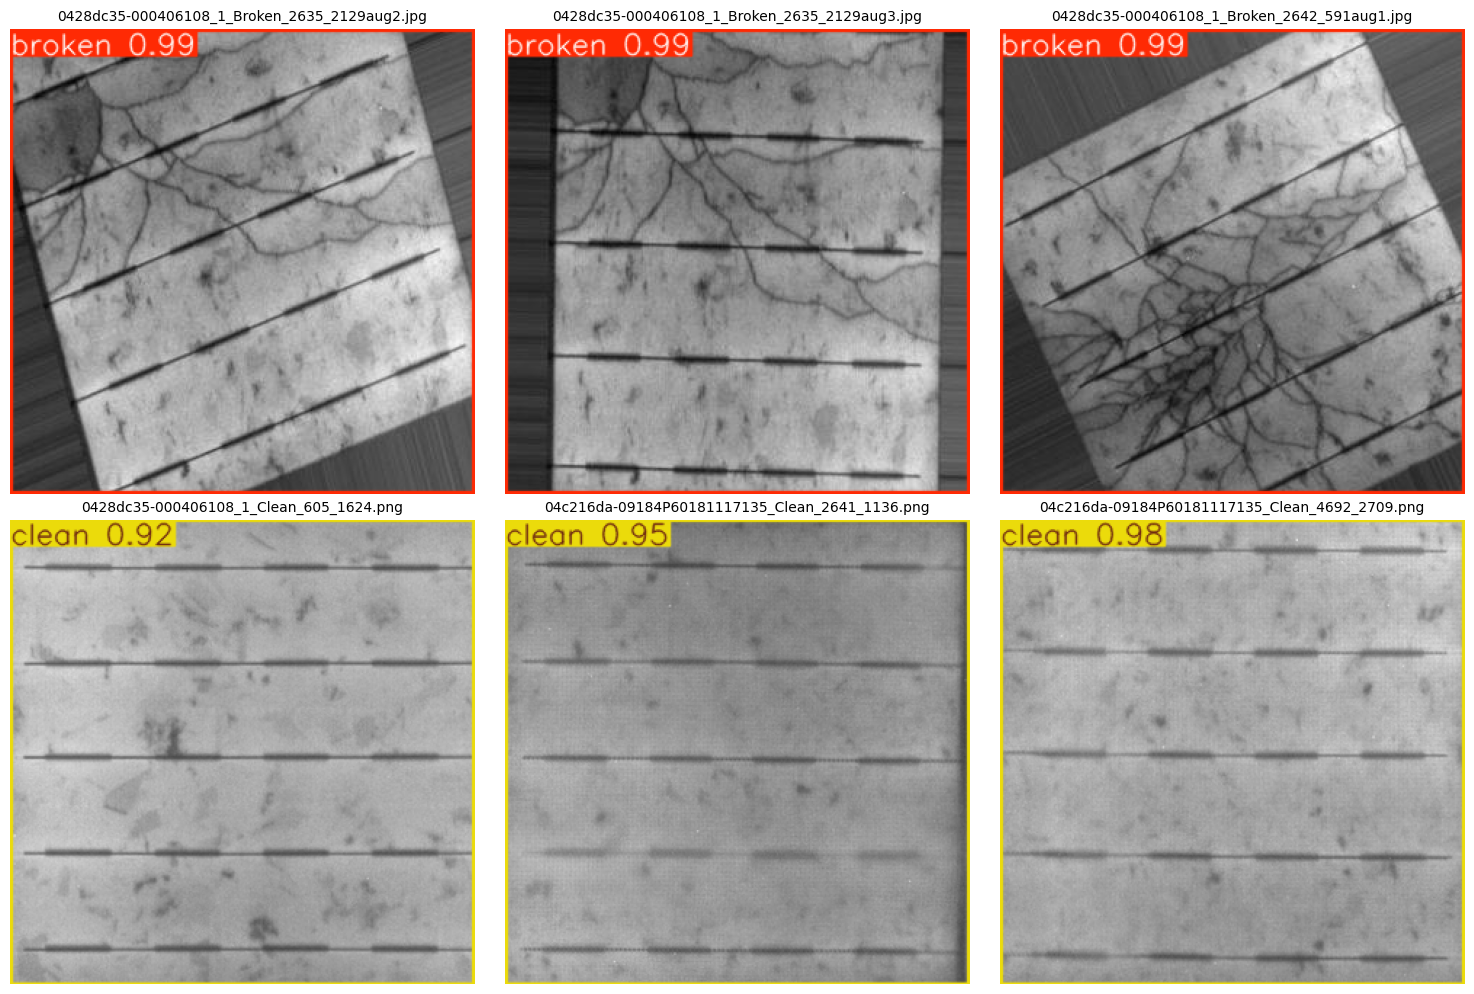

In [114]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO(r"C:/Users/asus/runs/detect/train9/weights/best.pt")

# List of test images (you can take first N images or a sample)
import glob
test_images = glob.glob(r"C:/Users/asus/Desktop/PV dataset/SPHERE DATASET/SPHERE DATASET/SPHERE - LABELLED DATASET/YOLO/images/test/*.*")
test_images = test_images[2:]  # show first 6 images

# Create a grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for ax, img_path in zip(axs.flatten(), test_images):
    results = model.predict(img_path, device="cpu")  # Run inference
    ax.imshow(results[0].plot())  # Plot predictions
    ax.axis('off')
    ax.set_title(img_path.split("\\")[-1], fontsize=10)  # Image name as title

plt.tight_layout()
plt.show()


In [56]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [5]:
from ultralytics import YOLO

model = YOLO(r"C:/Users/asus/runs/detect/train9/weights/best.pt")


In [60]:
import cv2
from ultralytics import YOLO
import os

# Paths
image_folder = r"C:/Users/asus/Desktop/PV dataset/SPHERE DATASET/SPHERE DATASET/SPHERE - LABELLED DATASET/YOLO/images/test"
output_video = r"C:/Users/asus/Desktop/PV_dataset_predictions.mp4"

# Load trained model
model = YOLO(r"C:/Users/asus/runs/detect/train9/weights/best.pt")

# Get all image paths
images = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith((".jpg", ".png"))]
images.sort()  # optional, sort by filename

# Video settings
frame_example = cv2.imread(images[0])
height, width, _ = frame_example.shape
fps = 5  # frames per second
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# Process images
for img_path in images:
    results = model.predict(img_path, device="cpu", conf=0.25)
    frame = results[0].plot()  # draws bounding boxes on image
    
    # Convert RGB (Ultralytics) to BGR (OpenCV)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    video_writer.write(frame)

video_writer.release()
print(f"Video saved at: {output_video}")



image 1/1 C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\images\test\022b6f1d-2702190116277_1_Broken_1047_2671aug0.jpg: 640x640 1 broken, 111.6ms
Speed: 37.4ms preprocess, 111.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\images\test\022b6f1d-2702190116277_1_Broken_1047_2671aug4.jpg: 640x640 1 broken, 105.1ms
Speed: 7.1ms preprocess, 105.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\images\test\0428dc35-000406108_1_Broken_2635_2129aug2.jpg: 640x640 1 broken, 102.7ms
Speed: 6.1ms preprocess, 102.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\images\test\0428dc35-0

In [84]:
from IPython.display import Video

# Display the video in Jupyter
Video(r"C:\Users\asus\Desktop\PV dataset\SPHERE DATASET\SPHERE DATASET\SPHERE - LABELLED DATASET\YOLO\PV_dataset_predictions.mp4", embed=True)
